In [281]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [282]:
df=pd.read_csv('mushrooms.csv')

In [283]:
df.head(15)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Содержимое:  
Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жаберных грибов семейства Agaricus и Lepiota, взятых из Полевого справочника Общества Одюбона по североамериканским грибам (1981). Каждый вид определяется как определенно съедобный, определенно ядовитый или съедобный неизвестного вида и не рекомендуется. Этот последний класс был объединен с ядовитым. В Руководстве четко указано, что простого правила для определения съедобности гриба не существует; никаких правил типа «листовки три, пусть будет» для Ядовитого Дуба и Плюща.

Данный датасет имеет 23 категориальных признака. Далее будет приведена расшифровка значения каждого признака:  
Attribute Information: (classes: съедобный=e, ядовитый=p)
- ***cap-shape***(Форма шляпки): колокольчик=b, коническая=c, выпуклая=x, плоская=f, бугристая=k, утопленная=s
- ***cap-surface***(Поверхность шляпки): волокнистая=f, с бороздками=g, чешуйчатая=y, гладкая=s
- ***cap-color***(Цвет шляпки): коричневая=n, бурая=b, светло-коричневая=c, серая=g, зеленая=r, розовая=p, фиолетовая=u, красная=e, белая=w, желтая=y
- ***bruises***(Синяки): есть=t, нет=f
- ***odor***(Запах): миндаль=a, анис=l, креозот=c, рыба=y, скверный=f, затхлый=m, нет=n, острый=p, пряный=s
- ***gill-attachment***(Прикрепление жабр): прикреплены=a, опущены=d, свободны=f, зазубрены=n
- ***gill-spacing***(Насколько близко жабры расположены друг к другу): близко=c, тесно=w, далеко=d
- ***gill-size***(Размер жабр): широкий=b, узкий=n
- ***gill-color***(Цвет жабр): черный=k, коричневый=n, цвет человеческой кожи=b, шоколадный=h, серый=g, зеленый=r, оранжевый=o, розовый=p, фиолетовый=u, красный=e, белый=w, желтый=y
- ***stalk-shape***(Форма ножки): тостая=e, узкая=t
- ***stalk-root***(Корень ножки): луковичный=b, клубень=c, чашечка=u, равный=e, ризоморфы=z, глубокие=r, отсутствует=?
- ***stalk-surface-above-ring***(Поверхность ножки над кольцом): волокнистая=f, чешуйчатая=y, шелковистая=k, гладкая=s
- ***stalk-surface-below-ring***(Поверхность ножки под кольцом): волокнистая=f, чешуйчатая=y, шелковистая=k, гладкая=s
- ***stalk-color-above-ring***(Цвет ножки над кольцом): коричневый=n, бурый=b, светло-коричневый=c, серый=g, оранжевый=o, розовый=p, красный=e, белый=w, желтый=y
- ***stalk-color-below-ring***(Цвет ножки под кольцом): коричневый=n, бурый=b, светло-коричневый=c, серый=g, оранжевый=o, розовый=p, красный=e, белый=w, желтый=y
- ***veil-type***(Тип вуали): частичная=p, универсальная=u
- ***veil-color***(Цвет вуали): коричневый=n, оранжевый=o, белый=w, желтый=y
- ***ring-number***(Кол-во колец): нет=n, одно=o, два=t
- ***ring-type***(Тип кольца): паутинка=c, исчезающий=e, расширяющийся книзу=f, большой=l, отсутствует=n, висячий=p, оболочка=s, зона=z
- ***spore-print-color***(Цвет печати спор): черный=k, коричневый=n, бурый=b, шоколадный=h, зеленый=r, оранжевый=o, фиолетовый=u, белый=w, желтый=y
- ***population***(Популяция): обильная=a, сгруппированная=c, многочисленная=n, рассеянная=s, некоторая=v, одиночная=y
- ***habitat***(Среда обитания): трава=g, листья=l, луга=m, тропы=p, городская=u, отходы=w, леса=d

In [285]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Заметим, что уникальных записей с параметром **veil-type** всего одна, это значит, что этот признак у всех записей один и тот же, следовательно он никаким образом не влияет на исследование и его можно удалить

In [286]:
df = df.drop('veil-type', axis=1)

Проведём небольшую предобработку данных, а именно разделим параметры на бинарные, те у которых всего два уникальных значения, и небинарные, у которых значений больше чем два.

In [287]:
binary_columns    = [c for c in df if df.describe(include = [object])[c]['unique'] == 2]
nonbinary_columns = [c for c in df if df.describe(include = [object])[c]['unique'] > 2]

В бинарных параметрах с помощью метода pandas *.factorize*, закодируем значения полей в 0 и 1.

In [288]:
for binary in binary_columns:
    df[binary] = df[binary].factorize()[0]

В небинарных параметрах используем метод pandas *.get_dummies*, который преобразует категориальные признаки в фективные/индикаторные, говоря иначе, из одного параметра имеющего 3 различных значений, этот метод сделает 3 уникальных параметра значений, которые будут бинарными.

In [289]:
vectorized_nonbinary_data = pd.get_dummies(df[nonbinary_columns])

Соединим бинарные и небинарные части обратно в единый датафрейм.

In [290]:
df = pd.concat((df[binary_columns], vectorized_nonbinary_data), axis = 1)

Построим корреляционную матрицу параметров и найдем значения корреляции относительно параметра **class** для того, чтобы определить, от каких параметров гриба наибольшая зависимость его съедобности или несъедобности

class                         1.000000
odor_n                        0.785557
ring-type_p                   0.540469
gill-size                     0.540024
stalk-surface-above-ring_s    0.491314
                                ...   
bruises                      -0.501530
gill-color_b                 -0.538808
stalk-surface-below-ring_k   -0.573524
stalk-surface-above-ring_k   -0.587658
odor_f                       -0.623842
Name: class, Length: 112, dtype: float64


<AxesSubplot: >

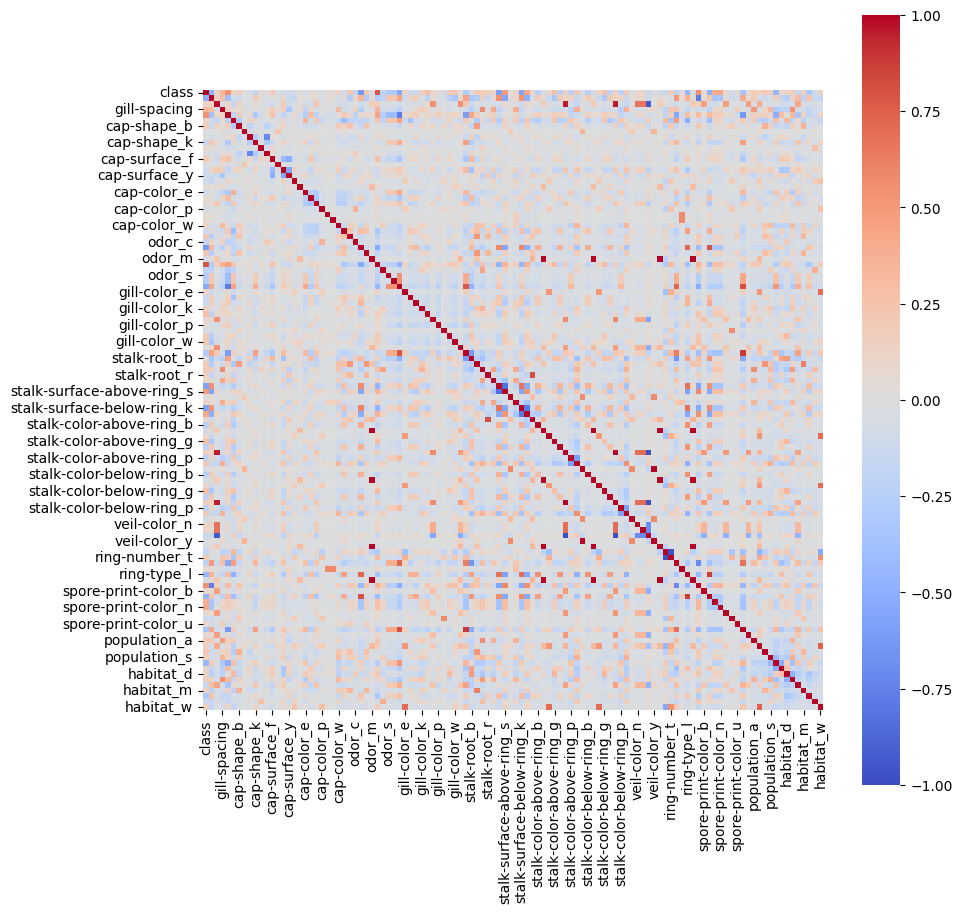

In [291]:
corr_matrix = df.corr()
corr_with_class = corr_matrix['class'].sort_values(ascending=False)
print(corr_with_class)
plt.figure(figsize = (10,10))
sns.heatmap(corr_matrix, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

Можем заметить *высокую положительную* корреляцию с признаком **odor_n**, *среднюю положительную* корреляцию с двумя признаками: **ring-type_p** и **gill-size**, *среднюю отрицательную* с признаками **odor_f**, **stalk-surface-above-ring_k**, **stalk-surface-below-ring_k**, **gill-color_b**, **bruises**.    

Разделим данные на части, которую будем предсказывать **y**, и по которой будем предсказывать **x**.

In [292]:
x = df.drop('class', axis = 1)
y = df['class']

Теперь разделим на тестовую и обучающую выборки:

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

### Обучение
#### Knn

err_test=0.0
knn_score=1.0


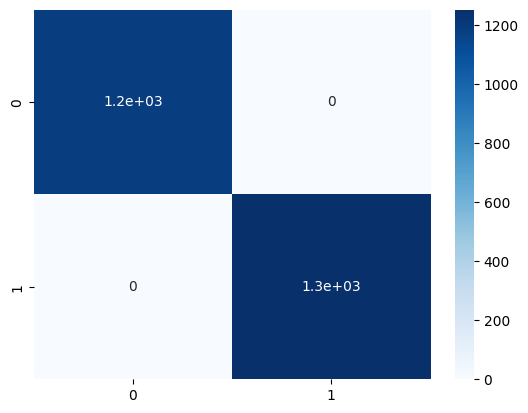

In [318]:
#Тренируем модель
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)
#Предсказываем на тестовой выборке
y_test_predict = knn.predict(x_test)
#Ошибка на тестовой выборке
err_test  = np.mean(y_test  != y_test_predict)
#f1 метрика качества модели
knn_score = f1_score(y_test,y_test_predict)

print(f"{err_test=}")
print(f"{knn_score=}")
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, cmap="Blues")
plt.show()

#### Логическая регрессия

err_test=0.0
lr_score=1.0


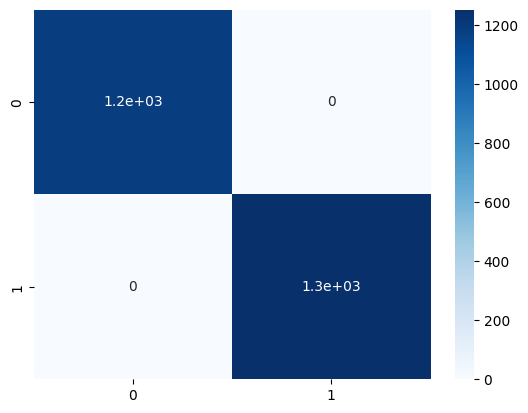

In [320]:
#Тренируем модель
lr = LogisticRegression()
lr.fit(x_train,y_train)
#Предсказываем на тестовой выборке
y_test_predict = lr.predict(x_test)
#Ошибка на тестовой выборке
err_test  = np.mean(y_test  != y_test_predict)
#f1 метрика качества модели
lr_score = f1_score(y_test,y_test_predict)

print(f"{err_test=}")
print(f"{lr_score=}")
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, cmap="Blues")
plt.show()

#### Дерево решений

err_test=0.0
lr_score=1.0


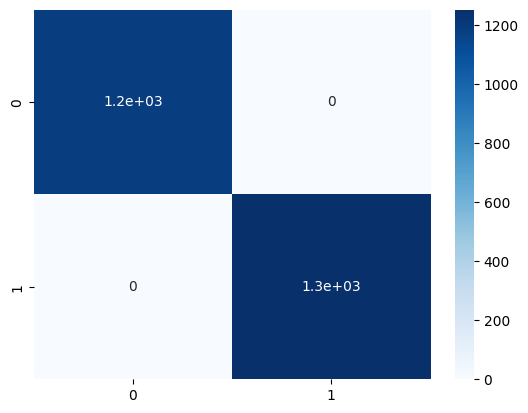

In [327]:
#Тренируем модель
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
#Предсказываем на тестовой выборке
y_test_predict = dt.predict(x_test)
#Ошибка на тестовой выборке
err_test  = np.mean(y_test  != y_test_predict)
#f1 метрика качества модели
dt_score = f1_score(y_test,y_test_predict)

print(f"{err_test=}")
print(f"{lr_score=}")
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, cmap="Blues")
plt.show()

#### Сводная таблица

Text(0.5, 1.0, 'График точностей моделей')

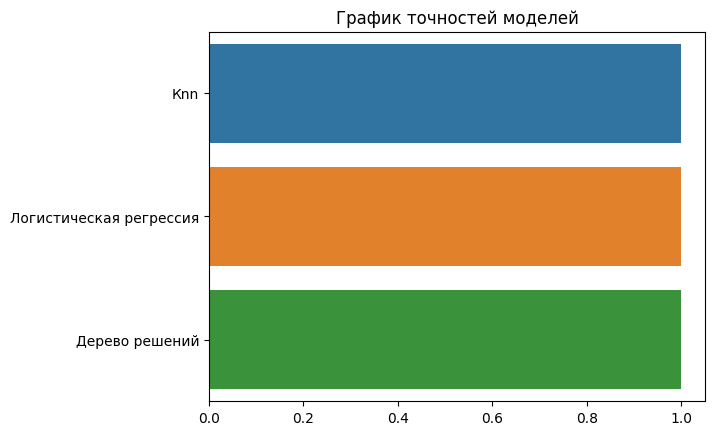

In [328]:
plt.figure()
scores = [knn_score, lr_score, dt_score]
name = ['Кnn', 'Логистическая регрессия', 'Дерево решений']
sns.barplot(x = scores, y = name)
plt.title("График точностей моделей")